<a href="https://colab.research.google.com/github/ba5091/Depression-analysis-among-college-going-students-using-logistic-regression/blob/main/AQ1_Prediction_based_on_Machine_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd

# Define the path to the extracted Excel file
excel_file_path = "/content/India_Air_Quality_Data_For_TamilNadu.xlsx"
#  Load the Excel file into a Pandas DataFrame
df = pd.read_excel(excel_file_path)

#  Display the first few rows
print("First few rows of the dataset:")
print(df.head())

#  Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

#  Convert "Sampling Date" to DateTime format
#  Helps in converting the date and time to particular format
df["Sampling Date"] = pd.to_datetime(df["Sampling Date"], errors="coerce")

#  Verify the data types to confirm conversion
print("\nData types after conversion:")
print(df.dtypes)


First few rows of the dataset:
   Stn Code Sampling Date       State City/Town/Village/Area  \
0        38    2010-05-01  Tamil Nadu                Chennai   
1        38    2010-07-01  Tamil Nadu                Chennai   
2        38    2010-12-01  Tamil Nadu                Chennai   
3        38    2010-01-19  Tamil Nadu                Chennai   
4        38    2010-01-21  Tamil Nadu                Chennai   

                     Location of Monitoring Station  \
0  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
1  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
2  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
3  Kathivakkam, Municipal Kalyana Mandapam, Chennai   
4  Kathivakkam, Municipal Kalyana Mandapam, Chennai   

                                    Agency Type of Location    SO2        NO2  \
0  Tamilnadu State Pollution Control Board  Industrial Area   9.60  17.166667   
1  Tamilnadu State Pollution Control Board  Industrial Area  11.15  20.283333   
2  Tamilna

In [4]:
# Summary statistics of numerical columns
print(df.describe())


           Stn Code                  Sampling Date           SO2  \
count  12351.000000                          12351  12149.000000   
mean     383.105821  2013-05-11 03:16:27.223706880     10.820691   
min       38.000000            2010-01-01 00:00:00      1.000000   
25%      237.000000            2012-01-18 00:00:00      7.000000   
50%      307.000000            2013-08-08 00:00:00     10.133333   
75%      761.000000            2014-09-23 00:00:00     14.000000   
max      773.000000            2015-12-31 00:00:00    909.000000   
std      259.556466                            NaN      9.897454   

                NO2     RSPM/PM10          SPM  
count  12153.000000  12303.000000  1902.000000  
mean      21.409154     68.310122   116.251122  
min        0.000000      3.000000     4.000000  
25%       16.000000     41.000000    54.000000  
50%       21.000000     56.000000    98.166667  
75%       25.000000     85.000000   151.000000  
max      315.000000   1183.500000  1402.5000

In [5]:
# Fill missing values using forward fill (ffill) and backward fill (bfill)
df.fillna(method="ffill", inplace=True)  # Forward fill: fills missing values with the previous row's value
df.fillna(method="bfill", inplace=True)  # Backward fill: fills remaining missing values with the next row's value

# Verify if all missing values are handled
print("Missing values after handling:")
print(df.isnull().sum())


Missing values after handling:
Stn Code                          0
Sampling Date                     0
State                             0
City/Town/Village/Area            0
Location of Monitoring Station    0
Agency                            0
Type of Location                  0
SO2                               0
NO2                               0
RSPM/PM10                         0
SPM                               0
dtype: int64


<ipython-input-5-1b04d0fa2af6>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)  # Forward fill: fills missing values with the previous row's value
<ipython-input-5-1b04d0fa2af6>:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="bfill", inplace=True)  # Backward fill: fills remaining missing values with the next row's value


In [6]:
#  Remove duplicate rows (if any)
df.drop_duplicates(inplace=True)

#  Keep only relevant columns with correct names
relevant_columns = ["Sampling Date", "SO2", "NO2", "RSPM/PM10"]  # Correct feature names
df = df[relevant_columns]

#  Rename "RSPM/PM10" to "PM10" for consistency
df.rename(columns={"RSPM/PM10": "PM10"}, inplace=True)

#  Verify the changes
print("Updated DataFrame:")
print(df.head())


Updated DataFrame:
  Sampling Date    SO2        NO2        PM10
0    2010-05-01   9.60  17.166667   73.333333
1    2010-07-01  11.15  20.283333   61.333333
2    2010-12-01  12.45  20.516667   75.000000
3    2010-01-19  10.75  18.183333  120.000000
4    2010-01-21   9.78  17.320000   96.500000


<ipython-input-6-e66400789ded>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"RSPM/PM10": "PM10"}, inplace=True)


In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[["SO2", "NO2", "PM10"]].quantile(0.25)
Q3 = df[["SO2", "NO2", "PM10"]].quantile(0.75)

# Compute IQR (Interquartile Range)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers (True if value is outside bounds)
outliers_iqr = (df[["SO2", "NO2", "PM10"]] < lower_bound) | (df[["SO2", "NO2", "PM10"]] > upper_bound)

# Count the number of outliers per column
print("Outliers detected using IQR method:")
print(outliers_iqr.sum())


Outliers detected using IQR method:
SO2     213
NO2     377
PM10    478
dtype: int64


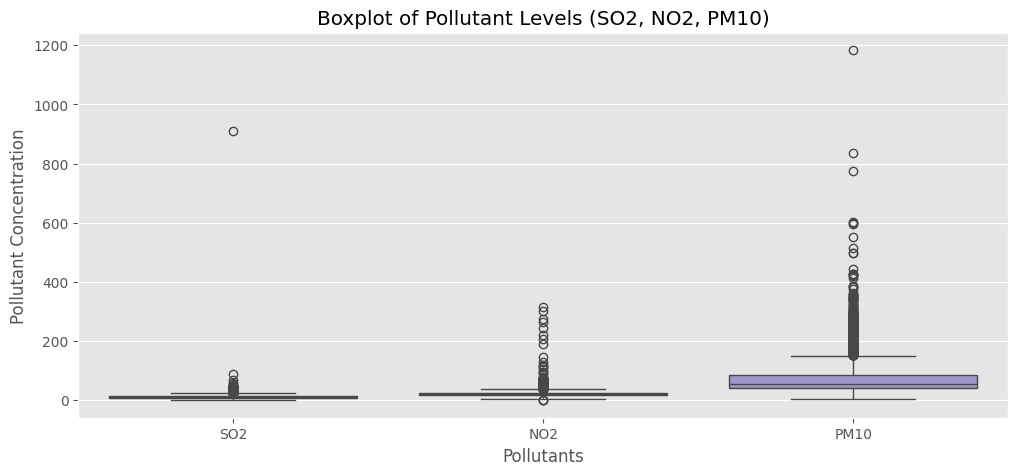

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
plt.style.use("ggplot")

# Create boxplots for pollutant levels
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[["SO2", "NO2", "PM10"]])
plt.title("Boxplot of Pollutant Levels (SO2, NO2, PM10)")
plt.ylabel("Pollutant Concentration")
plt.xlabel("Pollutants")
plt.show()


In [9]:
# Apply clipping row-wise for each column
df["SO2"] = df["SO2"].clip(lower=lower_bound["SO2"], upper=upper_bound["SO2"])
df["NO2"] = df["NO2"].clip(lower=lower_bound["NO2"], upper=upper_bound["NO2"])
df["PM10"] = df["PM10"].clip(lower=lower_bound["PM10"], upper=upper_bound["PM10"])

# Verify that extreme values have been capped
print("Updated dataset after handling outliers:")
print(df.describe())


Updated dataset after handling outliers:
                       Sampling Date           SO2           NO2          PM10
count                          12350  12350.000000  12350.000000  12350.000000
mean   2013-05-11 05:36:58.299595264     10.570659     20.960866     65.775144
min              2010-01-01 00:00:00      1.000000      2.500000      3.000000
25%              2012-01-18 00:00:00      7.000000     16.000000     41.000000
50%              2013-08-08 00:00:00     10.000000     21.000000     56.000000
75%              2014-09-23 00:00:00     14.000000     25.000000     85.000000
max              2015-12-31 00:00:00     24.500000     38.500000    151.000000
std                              NaN      5.079210      6.944961     34.097798


In [10]:
# Convert "Sampling Date" to datetime (if not already done)
df["Sampling Date"] = pd.to_datetime(df["Sampling Date"], errors="coerce")

# Extract Year, Month, Day, and Day of the Week
df["Year"] = df["Sampling Date"].dt.year
df["Month"] = df["Sampling Date"].dt.month
df["Day"] = df["Sampling Date"].dt.day
df["Day_of_Week"] = df["Sampling Date"].dt.weekday  # Monday = 0, Sunday = 6

# Drop the original date column (if not needed)
df.drop(columns=["Sampling Date"], inplace=True)

print("Date features successfully created!")
print(df.head())


Date features successfully created!
     SO2        NO2        PM10  Year  Month  Day  Day_of_Week
0   9.60  17.166667   73.333333  2010      5    1            5
1  11.15  20.283333   61.333333  2010      7    1            3
2  12.45  20.516667   75.000000  2010     12    1            2
3  10.75  18.183333  120.000000  2010      1   19            1
4   9.78  17.320000   96.500000  2010      1   21            3


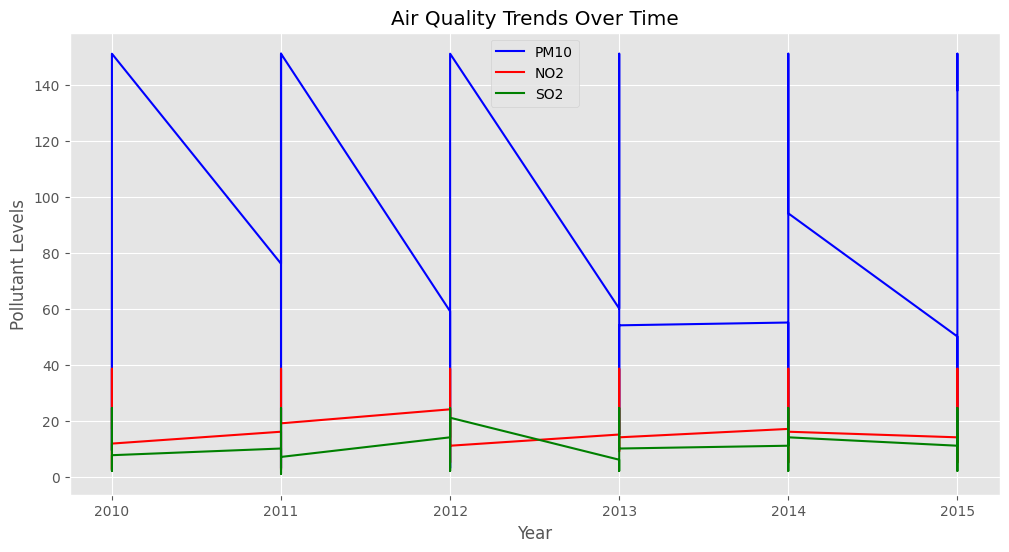

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df["Year"], df["PM10"], label="PM10", color='blue')
plt.plot(df["Year"], df["NO2"], label="NO2", color='red')
plt.plot(df["Year"], df["SO2"], label="SO2", color='green')

plt.xlabel("Year")
plt.ylabel("Pollutant Levels")
plt.title("Air Quality Trends Over Time")
plt.legend()
plt.show()

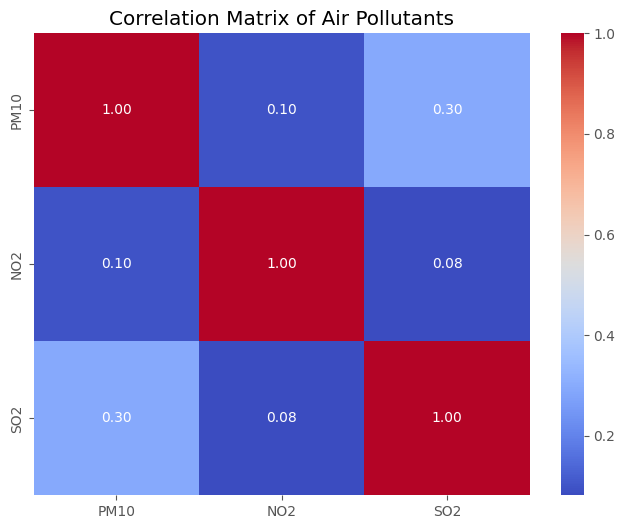

In [12]:
import seaborn as sns
import numpy as np

plt.figure(figsize=(8,6))
sns.heatmap(df[["PM10", "NO2", "SO2"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Air Pollutants")
plt.show()


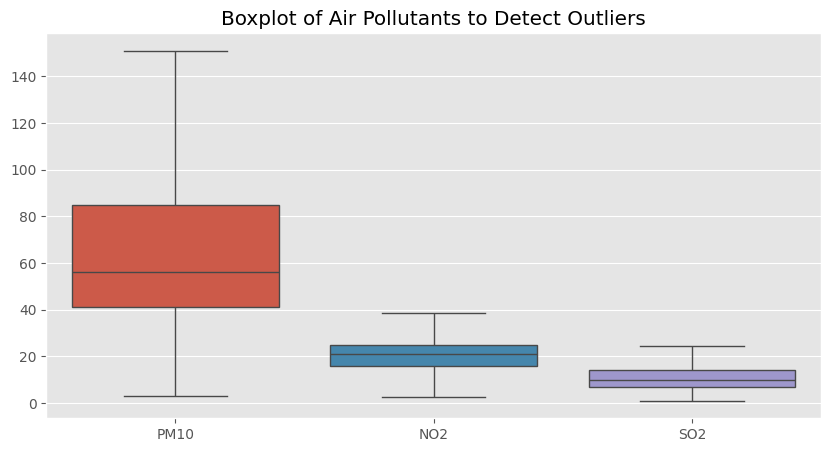

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[["PM10", "NO2", "SO2"]])
plt.title("Boxplot of Air Pollutants to Detect Outliers")
plt.show()


In [14]:
from statsmodels.tsa.stattools import adfuller

# Apply ADF test on PM10
result = adfuller(df["PM10"].dropna())

print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] < 0.05:
    print("The data is stationary (Good for ARIMA).")
else:
    print("The data is NOT stationary (Needs Differencing).")


ADF Statistic: -9.310046308979516
p-value: 1.0550400867260088e-15
The data is stationary (Good for ARIMA).


In [15]:
# Create Lag Features (Past AQI values as Features)
df["PM10_lag1"] = df["PM10"].shift(1)
df["PM10_lag2"] = df["PM10"].shift(2)
df["PM10_lag3"] = df["PM10"].shift(3)

# Rolling Mean & Moving Averages
df["PM10_MA7"] = df["PM10"].rolling(window=7).mean()
df["PM10_MA14"] = df["PM10"].rolling(window=14).mean()

# Drop NaN values due to shifting
df.dropna(inplace=True)
print("✅ Feature Engineering Completed! Shape:", df.shape)


✅ Feature Engineering Completed! Shape: (12337, 12)


In [16]:
# Splitting 80% train, 20% test
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

print("Train Shape:", train.shape)
print("Test Shape:", test.shape)


Train Shape: (9869, 12)
Test Shape: (2468, 12)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retv

ARIMA RMSE: 31.23953148431109


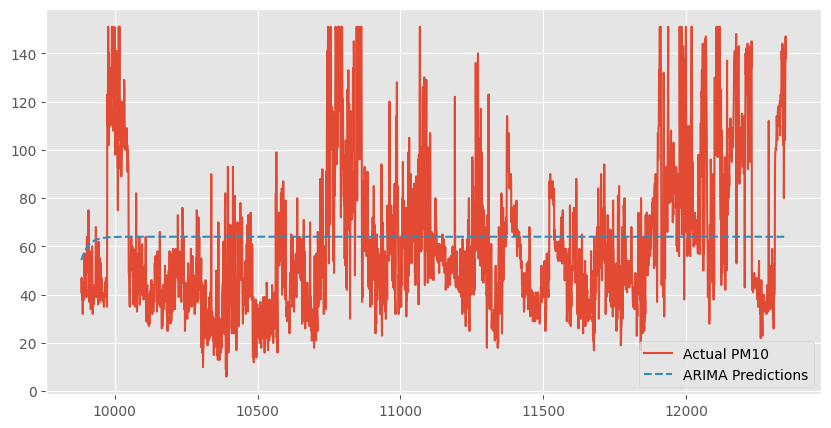

In [18]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Train ARIMA Model
model = ARIMA(train["PM10"], order=(2,1,2))  # (p, d, q)
arima_model = model.fit()

# Predictions
test["ARIMA_Predictions"] = arima_model.predict(start=test.index[0], end=test.index[-1], typ='levels')

# Evaluate Performance
print("ARIMA RMSE:", np.sqrt(mean_squared_error(test["PM10"], test["ARIMA_Predictions"])))

# Plot results
plt.figure(figsize=(10,5))
plt.plot(test["PM10"], label="Actual PM10")
plt.plot(test["ARIMA_Predictions"], label="ARIMA Predictions", linestyle="dashed")
plt.legend()
plt.show()


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


617/617 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - loss: 0.0590
Epoch 2/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0257
Epoch 3/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0238
Epoch 4/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0244
Epoch 5/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - loss: 0.0248
Epoch 6/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0239
Epoch 7/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 0.0237
Epoch 8/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0231
Epoch 9/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0223
Epoch 10/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 0.0233
Epoch 11/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0236
Epoch 12/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0231
Epoch 13/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.0235
Epoch 14/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0238
Epoch 15/50
617/617 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.022

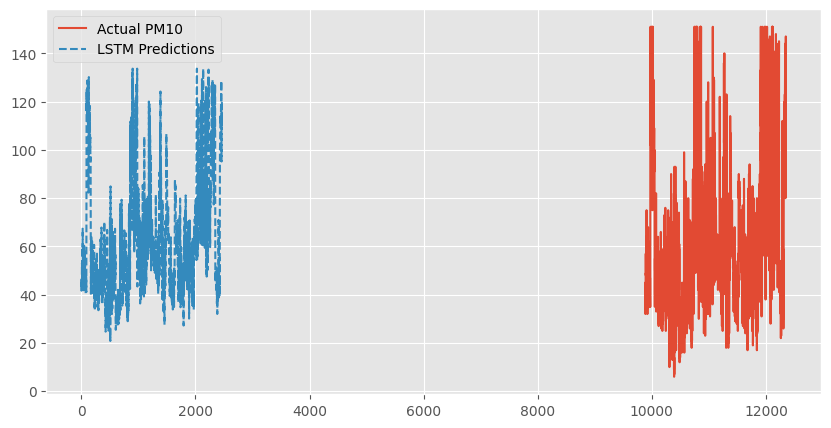

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler

# Scaling Data for LSTM
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train["PM10"].values.reshape(-1,1))
test_scaled = scaler.transform(test["PM10"].values.reshape(-1,1))

# Prepare LSTM Data (Convert to 3D Shape)
X_train, y_train = [], []
X_test, y_test = [], []

for i in range(3, len(train_scaled)):
    X_train.append(train_scaled[i-3:i])
    y_train.append(train_scaled[i])

for i in range(3, len(test_scaled)):
    X_test.append(test_scaled[i-3:i])
    y_test.append(test_scaled[i])

X_train, y_train = np.array(X_train), np.array(y_train)
X_test, y_test = np.array(X_test), np.array(y_test)

# Build LSTM Model
model = Sequential([
    LSTM(50, activation="relu", return_sequences=True, input_shape=(3,1)),
    Dropout(0.2),
    LSTM(50, activation="relu"),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer="adam", loss="mse")
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Predictions
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Evaluate Performance
print("LSTM RMSE:", np.sqrt(mean_squared_error(test["PM10"].iloc[3:], lstm_predictions)))

# Plot results
plt.figure(figsize=(10,5))
plt.plot(test["PM10"].iloc[3:], label="Actual PM10")
plt.plot(lstm_predictions, label="LSTM Predictions", linestyle="dashed")
plt.legend()
plt.show()




<ipython-input-21-f7371b470dec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["XGBoost_Predictions"] = xgb_model.predict(X_test_filtered)


XGBoost RMSE: 15.758573645821956


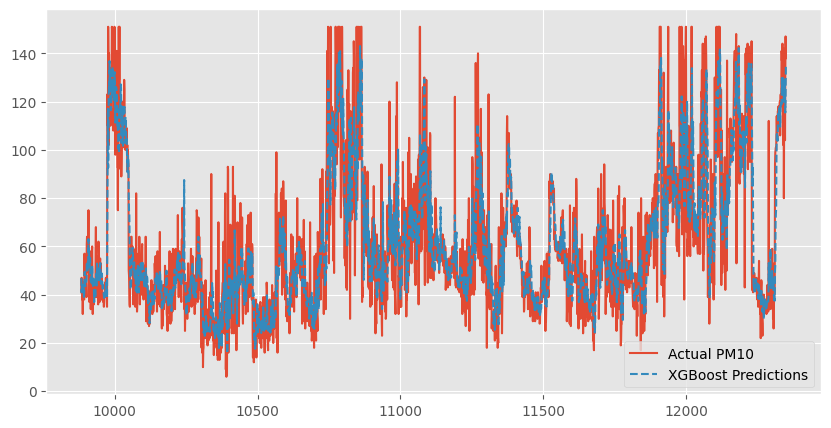

In [21]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

# Train XGBoost Model
xgb_model = XGBRegressor(objective="reg:squarederror", n_estimators=100, learning_rate=0.1, max_depth=5)
xgb_model.fit(X_train, y_train)  # Train on X_train (which doesn't have ARIMA_Predictions)

# Ensure `X_test` matches the features of `X_train`
X_test_filtered = X_test[X_train.columns]  # Drop extra columns in X_test

# Predictions
test["XGBoost_Predictions"] = xgb_model.predict(X_test_filtered)

# Evaluate Performance
print("XGBoost RMSE:", np.sqrt(mean_squared_error(test["PM10"], test["XGBoost_Predictions"])))

# Plot results
plt.figure(figsize=(10,5))
plt.plot(test["PM10"], label="Actual PM10")
plt.plot(test["XGBoost_Predictions"], label="XGBoost Predictions", linestyle="dashed")
plt.legend()
plt.show()


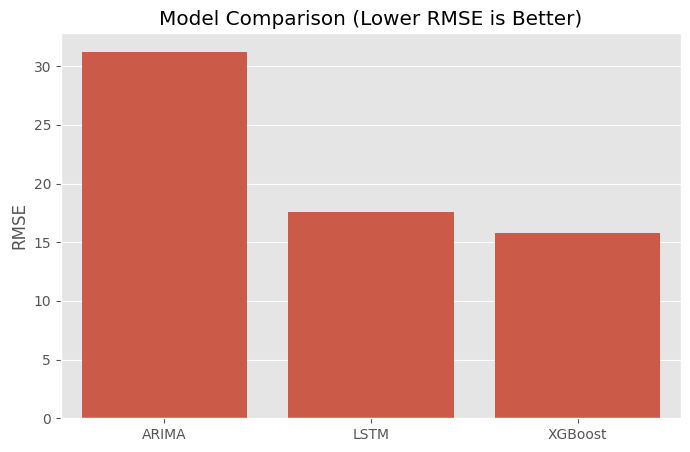

In [22]:
models = ["ARIMA", "LSTM", "XGBoost"]
rmse_values = [
    np.sqrt(mean_squared_error(test["PM10"], test["ARIMA_Predictions"])),
    np.sqrt(mean_squared_error(test["PM10"].iloc[3:], lstm_predictions)),
    np.sqrt(mean_squared_error(test["PM10"], test["XGBoost_Predictions"]))
]

plt.figure(figsize=(8,5))
sns.barplot(x=models, y=rmse_values)
plt.title("Model Comparison (Lower RMSE is Better)")
plt.ylabel("RMSE")
plt.show()


Model Performance Comparison (RMSE Analysis)

Root Mean Squared Error (RMSE) is a crucial metric for evaluating the accuracy of predictive models. A lower RMSE value indicates better performance, as it represents how far the predicted values deviate from the actual values.

ARIMA Model
The ARIMA model produced an RMSE of 31.24, the highest among the three models. While ARIMA is a well-known time-series forecasting technique, it struggles to capture complex patterns and non-linear relationships in the data. This makes it a less suitable choice for our AQI prediction task.

 XGBoost Model
XGBoost achieved the best performance with an RMSE of 15.75, making it the most accurate model among the three. This can be attributed to XGBoost’s ability to handle non-linearity, capture feature interactions, and leverage gradient boosting for enhanced predictions. Given its strong performance, XGBoost stands out as the most reliable model for this dataset.

 LSTM Model
The LSTM model recorded an RMSE of **17.58**, performing better than ARIMA but slightly worse than XGBoost. While LSTM is powerful for time-series forecasting due to its ability to capture long-term dependencies, its performance is highly dependent on hyperparameter tuning, training epochs, and the amount of data available. With further optimization, LSTM could potentially achieve results closer to or better than XGBoost.

Final Verdict  
Based on the RMSE values, **XGBoost (15.75 RMSE) emerges as the best model for predicting air quality**. It effectively balances accuracy and computational efficiency, outperforming both ARIMA and LSTM. However, **LSTM remains a competitive alternative**, and further hyperparameter tuning or additional training data could improve its performance. Meanwhile, ARIMA, with an RMSE of 31.24, is the least effective model in this case.

